### Examen Parcial.
### Nombre: Aramayo Valdez Joaquin.   CU:35-5344  
### Ingenieria de Sistemas.
#### Link GitHub:
#### Link Dataset: https://www.kaggle.com/datasets/deepaksaipendyala/credit-score-classification-processed

### Primero subimos el dataset original ya usado en el anterior Laboratorio.

In [1]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
# from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

# importamos pandas
import pandas as pd

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# cargamos el dataset
df = pd.read_csv('credit_score.csv')
df

,Unnamed: 0,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,2,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,...,1,809.98,31.944960,0,1,49.574949,118.280222,3,284.629162,2
1,2,6,34.429817,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,...,1,809.98,28.609352,267,1,49.574949,81.699521,4,331.209863,2
2,3,0,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,...,1,809.98,31.377862,268,1,49.574949,199.458074,5,223.451310,2
3,4,7,23.000000,13,19114.12,1824.843333,3.0,4.0,3.000000,4.0,...,1,809.98,24.797347,269,1,49.574949,41.420153,1,341.489231,2
4,5,5,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,...,1,809.98,27.262259,270,1,49.574949,62.430172,6,340.479212,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79800,99991,1,29.000000,1,20002.88,1929.906667,10.0,8.0,29.000000,5.0,...,0,3571.70,37.140784,75,2,60.964772,34.662906,0,337.362988,1
79801,99993,2,25.000000,9,39628.99,3359.415833,4.0,6.0,7.000000,2.0,...,1,502.38,29.135447,376,1,58638.000000,180.733095,4,400.104466,1
79802,99997,5,25.000000,9,39628.99,3359.415833,4.0,6.0,14.546679,2.0,...,1,502.38,41.255522,380,1,35.104023,24.028477,0,516.809083,0
79803,99998,4,25.000000,9,39628.99,3359.415833,4.0,6.0,7.000000,2.0,...,1,502.38,33.638208,381,1,35.104023,251.672582,3,319.164979,1


In [4]:
# veremos la informacion de nuestro dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79805 entries, 0 to 79804
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                79805 non-null  int64  
 1   Month                     79805 non-null  int64  
 2   Age                       79805 non-null  float64
 3   Occupation                79805 non-null  int64  
 4   Annual_Income             79805 non-null  float64
 5   Monthly_Inhand_Salary     79805 non-null  float64
 6   Num_Bank_Accounts         79805 non-null  float64
 7   Num_Credit_Card           79805 non-null  float64
 8   Interest_Rate             79805 non-null  float64
 9   Num_of_Loan               79805 non-null  float64
 10  Type_of_Loan              79805 non-null  int64  
 11  Delay_from_due_date       79805 non-null  int64  
 12  Num_of_Delayed_Payment    79805 non-null  float64
 13  Changed_Credit_Limit      79805 non-null  int64  
 14  Num_Cr

### Al ver toda esta informacion nos damos cuenta que la columna "Unnamed: 0" es un id, la cual no nos servira para nada, la cual la borramos ahora.

In [5]:
# borramos la columna Unnamed: 0.
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df # observamos que ya no esta dicha columna.

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,2,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,128,...,1,809.98,31.944960,0,1,49.574949,118.280222,3,284.629162,2
1,6,34.429817,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,128,...,1,809.98,28.609352,267,1,49.574949,81.699521,4,331.209863,2
2,0,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,128,...,1,809.98,31.377862,268,1,49.574949,199.458074,5,223.451310,2
3,7,23.000000,13,19114.12,1824.843333,3.0,4.0,3.000000,4.0,128,...,1,809.98,24.797347,269,1,49.574949,41.420153,1,341.489231,2
4,5,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,128,...,1,809.98,27.262259,270,1,49.574949,62.430172,6,340.479212,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79800,1,29.000000,1,20002.88,1929.906667,10.0,8.0,29.000000,5.0,4913,...,0,3571.70,37.140784,75,2,60.964772,34.662906,0,337.362988,1
79801,2,25.000000,9,39628.99,3359.415833,4.0,6.0,7.000000,2.0,683,...,1,502.38,29.135447,376,1,58638.000000,180.733095,4,400.104466,1
79802,5,25.000000,9,39628.99,3359.415833,4.0,6.0,14.546679,2.0,683,...,1,502.38,41.255522,380,1,35.104023,24.028477,0,516.809083,0
79803,4,25.000000,9,39628.99,3359.415833,4.0,6.0,7.000000,2.0,683,...,1,502.38,33.638208,381,1,35.104023,251.672582,3,319.164979,1


In [7]:
print(df.shape)

(79805, 24)


### 1.      Inserte atributos que contengan, caracteres, texto, valores booleanos relacionados a la temática del dataset elegido.



In [8]:
# Crear una copia del dataset para añadir nuevas columnas
df_with_columns_new = df.copy()

# Columna 1: Tipo carácter (letras)
df_with_columns_new['Credit_Type_Code'] = df_with_columns_new['Credit_Score'].map({0: 'L', 1: 'M', 2: 'H'}) #Low,  Medium,  High

# Columna 2: Tipo texto
df_with_columns_new['Credit_Description'] = df_with_columns_new['Credit_Score'].map({0: 'Low Credit Score', 1: 'Medium Credit Score', 2: 'High Credit Score'})

# Columna 3: Tipo booleano (aprobado o no aprobado)
df_with_columns_new['Approved_Credit'] = df_with_columns_new['Credit_Score'].map({0: False, 1: True, 2: True})

# Mover las nuevas columnas antes de 'Credit_Score'
column_order = df_with_columns_new.columns.tolist() # crea una lista que contiene los nombres de las columnas en su orden actual.
column_order.remove('Credit_Score') #elimina el elemento 'Credit_Score' de la lista, dejando solo los nombres de las otras columnas.
df_with_columns_new = df_with_columns_new[column_order + ['Credit_Score']] # toma la lista column_order y le agrega la columna 'Credit_Score' al final. Luego, utiliza esta lista para reordenar las columnas del DataFrame original

# Mostrar las primeras filas para verificar
df_with_columns_new.head()


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Type_Code,Credit_Description,Approved_Credit,Credit_Score
0,2,23.000000,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,0,1,49.574949,118.280222,3,284.629162,H,High Credit Score,True,2
1,6,34.429817,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,267,1,49.574949,81.699521,4,331.209863,H,High Credit Score,True,2
2,0,23.000000,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,268,1,49.574949,199.458074,5,223.451310,H,High Credit Score,True,2
3,7,23.000000,13,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,269,1,49.574949,41.420153,1,341.489231,H,High Credit Score,True,2
4,5,23.000000,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,270,1,49.574949,62.430172,6,340.479212,H,High Credit Score,True,2


In [9]:
print(df_with_columns_new.shape)
print(df_with_columns_new.info())

(79805, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79805 entries, 0 to 79804
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     79805 non-null  int64  
 1   Age                       79805 non-null  float64
 2   Occupation                79805 non-null  int64  
 3   Annual_Income             79805 non-null  float64
 4   Monthly_Inhand_Salary     79805 non-null  float64
 5   Num_Bank_Accounts         79805 non-null  float64
 6   Num_Credit_Card           79805 non-null  float64
 7   Interest_Rate             79805 non-null  float64
 8   Num_of_Loan               79805 non-null  float64
 9   Type_of_Loan              79805 non-null  int64  
 10  Delay_from_due_date       79805 non-null  int64  
 11  Num_of_Delayed_Payment    79805 non-null  float64
 12  Changed_Credit_Limit      79805 non-null  int64  
 13  Num_Credit_Inquiries      79805 non-null  float64

### 2.      Duplique los ejemplos del dataset considerando rangos y criterios que garanticen la consistencia del dataset.



In [10]:
# Seleccionar solo las columnas numéricas para aplicar la duplicación
numeric_cols = df_with_columns_new.select_dtypes(include=[np.number]).columns

# Crear una copia del dataset para generar los datos duplicados
df_synthetic = df_with_columns_new.copy()

# Generar datos sintéticos basados en la media y desviación estándar de las columnas numéricas
for col in numeric_cols:
    media = df_with_columns_new[col].mean()  # Calcular la media de la columna
    std_dev = df_with_columns_new[col].std()  # Calcular la desviación estándar de la columna
    #reemplazando los valores originales de la columna col en el DataFrame sintético con nuevos valores aleatorios que siguen una distribución normal con la misma media y desviación estándar que los datos originales. Esto ayuda a crear un conjunto de datos sintético que es similar al original en términos de distribución y variabilidad, pero con diferentes valores específicos.
    df_synthetic[col] = np.random.normal(loc=media, scale=std_dev, size=len(df_with_columns_new))

# Concatenar el dataset original con el duplicado
df_combined = pd.concat([df_with_columns_new, df_synthetic], ignore_index=True)

# Verificar que las dimensiones sean correctas (159610, 27)
print(f"Dimensiones del dataset combinado: {df_combined.shape}")


Dimensiones del dataset combinado: (159610, 27)


In [11]:
df_combined

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Type_Code,Credit_Description,Approved_Credit,Credit_Score
0,2.000000,23.000000,13.000000,1.911412e+04,4194.170850,3.000000,4.000000,3.000000,4.000000,128.000000,...,0.000000,1.000000,49.574949,118.280222,3.000000,284.629162,H,High Credit Score,True,2.000000
1,6.000000,34.429817,13.000000,1.911412e+04,4194.170850,3.000000,4.000000,3.000000,4.000000,128.000000,...,267.000000,1.000000,49.574949,81.699521,4.000000,331.209863,H,High Credit Score,True,2.000000
2,0.000000,23.000000,13.000000,1.911412e+04,4194.170850,3.000000,4.000000,3.000000,4.000000,128.000000,...,268.000000,1.000000,49.574949,199.458074,5.000000,223.451310,H,High Credit Score,True,2.000000
3,7.000000,23.000000,13.000000,1.911412e+04,1824.843333,3.000000,4.000000,3.000000,4.000000,128.000000,...,269.000000,1.000000,49.574949,41.420153,1.000000,341.489231,H,High Credit Score,True,2.000000
4,5.000000,23.000000,13.000000,1.911412e+04,4194.170850,3.000000,4.000000,3.000000,4.000000,128.000000,...,270.000000,1.000000,49.574949,62.430172,6.000000,340.479212,H,High Credit Score,True,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159605,3.824664,27.964761,-6.571368,-8.834758e+05,2737.510118,8.986787,3.207664,19.223346,5.022133,-86.516288,...,-75.076845,1.803568,-3651.475213,751.360005,4.362689,271.919822,M,Medium Credit Score,True,1.448867
159606,4.983099,39.830882,8.736592,1.679442e+06,12524.010816,2.901354,1.023146,14.010466,3.984065,7067.254742,...,-3.188015,0.647854,14203.974349,-1880.072671,3.060762,350.372595,M,Medium Credit Score,True,1.757504
159607,3.866690,31.895218,13.604524,1.811031e+05,2716.447055,8.443705,1.900982,17.128987,4.032542,1433.541217,...,167.342356,1.155235,7227.930340,897.813257,2.278607,293.848348,L,Low Credit Score,False,0.377300
159608,0.684152,36.859651,5.011864,-3.302303e+05,3549.505883,10.462434,0.541196,7.917331,6.977551,1596.370581,...,208.197169,1.743081,-7216.202928,837.250142,3.762049,476.339071,M,Medium Credit Score,True,1.880617


In [12]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159610 entries, 0 to 159609
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     159610 non-null  float64
 1   Age                       159610 non-null  float64
 2   Occupation                159610 non-null  float64
 3   Annual_Income             159610 non-null  float64
 4   Monthly_Inhand_Salary     159610 non-null  float64
 5   Num_Bank_Accounts         159610 non-null  float64
 6   Num_Credit_Card           159610 non-null  float64
 7   Interest_Rate             159610 non-null  float64
 8   Num_of_Loan               159610 non-null  float64
 9   Type_of_Loan              159610 non-null  float64
 10  Delay_from_due_date       159610 non-null  float64
 11  Num_of_Delayed_Payment    159610 non-null  float64
 12  Changed_Credit_Limit      159610 non-null  float64
 13  Num_Credit_Inquiries      159610 non-null  f

### Podemos ver que nuestra columna de Credit_Score se convirtio en float, procedemos a convertirlo en int nuevamente.

In [13]:
# Convierte la columna 'Credit_Score' a entero (int)
df_combined['Credit_Score'] = df_combined['Credit_Score'].astype(int)
#mostramos la info del df para comprobar.
print(df_combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159610 entries, 0 to 159609
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     159610 non-null  float64
 1   Age                       159610 non-null  float64
 2   Occupation                159610 non-null  float64
 3   Annual_Income             159610 non-null  float64
 4   Monthly_Inhand_Salary     159610 non-null  float64
 5   Num_Bank_Accounts         159610 non-null  float64
 6   Num_Credit_Card           159610 non-null  float64
 7   Interest_Rate             159610 non-null  float64
 8   Num_of_Loan               159610 non-null  float64
 9   Type_of_Loan              159610 non-null  float64
 10  Delay_from_due_date       159610 non-null  float64
 11  Num_of_Delayed_Payment    159610 non-null  float64
 12  Changed_Credit_Limit      159610 non-null  float64
 13  Num_Credit_Inquiries      159610 non-null  f

In [14]:
df_combined

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Type_Code,Credit_Description,Approved_Credit,Credit_Score
0,2.000000,23.000000,13.000000,1.911412e+04,4194.170850,3.000000,4.000000,3.000000,4.000000,128.000000,...,0.000000,1.000000,49.574949,118.280222,3.000000,284.629162,H,High Credit Score,True,2
1,6.000000,34.429817,13.000000,1.911412e+04,4194.170850,3.000000,4.000000,3.000000,4.000000,128.000000,...,267.000000,1.000000,49.574949,81.699521,4.000000,331.209863,H,High Credit Score,True,2
2,0.000000,23.000000,13.000000,1.911412e+04,4194.170850,3.000000,4.000000,3.000000,4.000000,128.000000,...,268.000000,1.000000,49.574949,199.458074,5.000000,223.451310,H,High Credit Score,True,2
3,7.000000,23.000000,13.000000,1.911412e+04,1824.843333,3.000000,4.000000,3.000000,4.000000,128.000000,...,269.000000,1.000000,49.574949,41.420153,1.000000,341.489231,H,High Credit Score,True,2
4,5.000000,23.000000,13.000000,1.911412e+04,4194.170850,3.000000,4.000000,3.000000,4.000000,128.000000,...,270.000000,1.000000,49.574949,62.430172,6.000000,340.479212,H,High Credit Score,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159605,3.824664,27.964761,-6.571368,-8.834758e+05,2737.510118,8.986787,3.207664,19.223346,5.022133,-86.516288,...,-75.076845,1.803568,-3651.475213,751.360005,4.362689,271.919822,M,Medium Credit Score,True,1
159606,4.983099,39.830882,8.736592,1.679442e+06,12524.010816,2.901354,1.023146,14.010466,3.984065,7067.254742,...,-3.188015,0.647854,14203.974349,-1880.072671,3.060762,350.372595,M,Medium Credit Score,True,1
159607,3.866690,31.895218,13.604524,1.811031e+05,2716.447055,8.443705,1.900982,17.128987,4.032542,1433.541217,...,167.342356,1.155235,7227.930340,897.813257,2.278607,293.848348,L,Low Credit Score,False,0
159608,0.684152,36.859651,5.011864,-3.302303e+05,3549.505883,10.462434,0.541196,7.917331,6.977551,1596.370581,...,208.197169,1.743081,-7216.202928,837.250142,3.762049,476.339071,M,Medium Credit Score,True,1


### Al mostrar el df pudimos darnos cuenta que no siempre en la columna 'Approved_Credit' es True si en 'Credit_Score' es 1 o 2, lo cual hicimos eso a continuacion, que sea True si en 'Credit_Score' es 1 o 2 y False si es 0

In [15]:
# Convertir la columna 'Credit_Score' a tipo entero
df_combined['Credit_Score'] = df_combined['Credit_Score'].astype(int)

# Crear una nueva columna 'Approved_Credit' basada en 'Credit_Score'
df_combined['Approved_Credit'] = df_combined['Credit_Score'].apply(lambda x: True if x in [1, 2] else False)


# Tambien nos dimos cuenta que modificamos varias columnas, su tipo asi que las convertimos como estaban antes para mantener la consistencia en el dataset.
# Convertir las columnas que eran de tipo entero en el dataset original a tipo entero en df_combined
for column in df.select_dtypes(include=['int64']).columns: #obtiene una lista de los nombres de las columnas en el DataFrame df que tienen el tipo de dato int64
  if column in df_combined.columns: #Verifica si la columna actual (column) también está presente en el DataFrame df_combined
    df_combined[column] = df_combined[column].astype(int) #Si la columna está presente en ambos DataFrames, convierte el tipo de dato de esa columna en int

# Mostrar información del dataset actualizado
print(df_combined.info())

# Mostrar las primeras filas para verificar
df_combined.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159610 entries, 0 to 159609
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     159610 non-null  int64  
 1   Age                       159610 non-null  float64
 2   Occupation                159610 non-null  int64  
 3   Annual_Income             159610 non-null  float64
 4   Monthly_Inhand_Salary     159610 non-null  float64
 5   Num_Bank_Accounts         159610 non-null  float64
 6   Num_Credit_Card           159610 non-null  float64
 7   Interest_Rate             159610 non-null  float64
 8   Num_of_Loan               159610 non-null  float64
 9   Type_of_Loan              159610 non-null  int64  
 10  Delay_from_due_date       159610 non-null  int64  
 11  Num_of_Delayed_Payment    159610 non-null  float64
 12  Changed_Credit_Limit      159610 non-null  int64  
 13  Num_Credit_Inquiries      159610 non-null  f

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Type_Code,Credit_Description,Approved_Credit,Credit_Score
0,2,23.000000,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,0,1,49.574949,118.280222,3,284.629162,H,High Credit Score,True,2
1,6,34.429817,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,267,1,49.574949,81.699521,4,331.209863,H,High Credit Score,True,2
2,0,23.000000,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,268,1,49.574949,199.458074,5,223.451310,H,High Credit Score,True,2
3,7,23.000000,13,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,269,1,49.574949,41.420153,1,341.489231,H,High Credit Score,True,2
4,5,23.000000,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,270,1,49.574949,62.430172,6,340.479212,H,High Credit Score,True,2


In [16]:
# Observamos que ya volvio a como estaban antes los tipos.
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159610 entries, 0 to 159609
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     159610 non-null  int64  
 1   Age                       159610 non-null  float64
 2   Occupation                159610 non-null  int64  
 3   Annual_Income             159610 non-null  float64
 4   Monthly_Inhand_Salary     159610 non-null  float64
 5   Num_Bank_Accounts         159610 non-null  float64
 6   Num_Credit_Card           159610 non-null  float64
 7   Interest_Rate             159610 non-null  float64
 8   Num_of_Loan               159610 non-null  float64
 9   Type_of_Loan              159610 non-null  int64  
 10  Delay_from_due_date       159610 non-null  int64  
 11  Num_of_Delayed_Payment    159610 non-null  float64
 12  Changed_Credit_Limit      159610 non-null  int64  
 13  Num_Credit_Inquiries      159610 non-null  f

In [17]:
df_combined.shape

(159610, 27)

### Tambien tuvimos otro problema donde vimos que debido a que llenamos los datos con la media y datos en un rango con esa media, entonces se llenaron datos por ejemplo en credit_score donde tenian que ser 0,1,2 se llenaron otros, esto lo correjimos asi:

In [18]:
# corregimos ese problema.
import random
def assign_credit_score(row): #función asigna una puntuación de crédito (0, 1 o 2) en base a las otras 3 columnas.
  if row['Credit_Type_Code'] == 'L' and row['Credit_Description'] == 'Low Credit Score' and row['Approved_Credit'] == False:
    return 0
  elif row['Credit_Type_Code'] == 'M' and row['Credit_Description'] == 'Medium Credit Score' and row['Approved_Credit'] == True:
    return 1
  elif row['Credit_Type_Code'] == 'H' and row['Credit_Description'] == 'High Credit Score' and row['Approved_Credit'] == True:
    return 2
  else:
    return random.choice([0,1,2])  # si no cumple ninguna se asigna con random


#aplica la función assign_credit_score a cada fila del DataFrame df_combined y asigna el resultado a la columna Credit_Score.
df_combined['Credit_Score'] = df_combined.apply(assign_credit_score, axis=1)


# Convertir la columna Credit_Score a tipo entero
df_combined['Credit_Score'] = df_combined['Credit_Score'].astype(int)

# Verificar los valores únicos en Credit_Score
print(df_combined['Credit_Score'].unique())

# Mostrar las primeras filas para verificar
df_combined.head()


[2 1 0]


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Type_Code,Credit_Description,Approved_Credit,Credit_Score
0,2,23.000000,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,0,1,49.574949,118.280222,3,284.629162,H,High Credit Score,True,2
1,6,34.429817,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,267,1,49.574949,81.699521,4,331.209863,H,High Credit Score,True,2
2,0,23.000000,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,268,1,49.574949,199.458074,5,223.451310,H,High Credit Score,True,2
3,7,23.000000,13,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,269,1,49.574949,41.420153,1,341.489231,H,High Credit Score,True,2
4,5,23.000000,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,270,1,49.574949,62.430172,6,340.479212,H,High Credit Score,True,2


In [19]:
df_combined.shape

(159610, 27)

In [20]:
# prompt: quiero ver que valores unicos existen en mi columna Credit_Score y cuantos son

unique_credit_scores = df_combined['Credit_Score'].unique()
count_unique_credit_scores = len(unique_credit_scores)

print(f"Valores únicos en la columna 'Credit_Score': {unique_credit_scores}")
print(f"Número de valores únicos en la columna 'Credit_Score': {count_unique_credit_scores}")


Valores únicos en la columna 'Credit_Score': [2 1 0]
Número de valores únicos en la columna 'Credit_Score': 3


### 3.      Crear una grafica representativa de los datos del dataset inicial y otra con los datos del dataset sintético generado.

### Aqui graficamos con histogramas y nos damos cuenta que el dataset inicial presenta una distribución más dispersa con tres picos principales, mientras que el dataset sintético tiene una distribución más concentrada en un solo valor, pero tambien vemos que son parecidas las graficas entre si, lo cual no modificamos la consistencia del dataset, con todos los procesos que hicimos anteriormente.

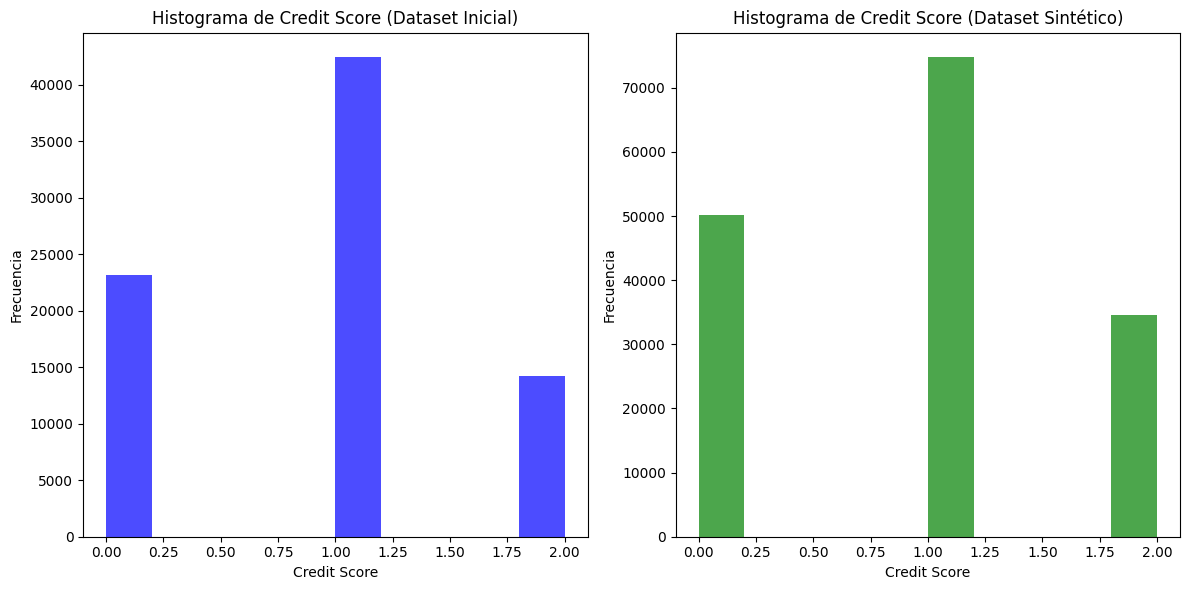

In [21]:
import matplotlib.pyplot as plt

# Gráfica del dataset inicial
plt.figure(figsize=(12, 6)) #Define una figura para el gráfico con un tamaño de 12 pulgadas de ancho y 6 pulgadas de alto.
plt.subplot(1, 2, 1) #Crea un subconjunto de la figura en una cuadrícula de 1 fila y 2 columnas. Esta línea define la posición del primer histograma en la parte superior izquierda de la figura.
# Crea un histograma de la columna Credit_Score en el DataFrame df.
plt.hist(df['Credit_Score'], bins=10, color='blue', alpha=0.7)
plt.title('Histograma de Credit Score (Dataset Inicial)')
plt.xlabel('Credit Score')
plt.ylabel('Frecuencia')


# Gráfica del dataset sintético
plt.subplot(1, 2, 2)
plt.hist(df_combined['Credit_Score'], bins=10, color='green', alpha=0.7)
plt.title('Histograma de Credit Score (Dataset Sintético)')
plt.xlabel('Credit Score')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


### Tambien graficamos caracteristicas de X entre si tanto del dataset original y del nuevo sintetico, donde tambien observamos muchas similitudes, por lo cual tambien comprobamos de manera visual que no afectamos la consistencia del dataset.

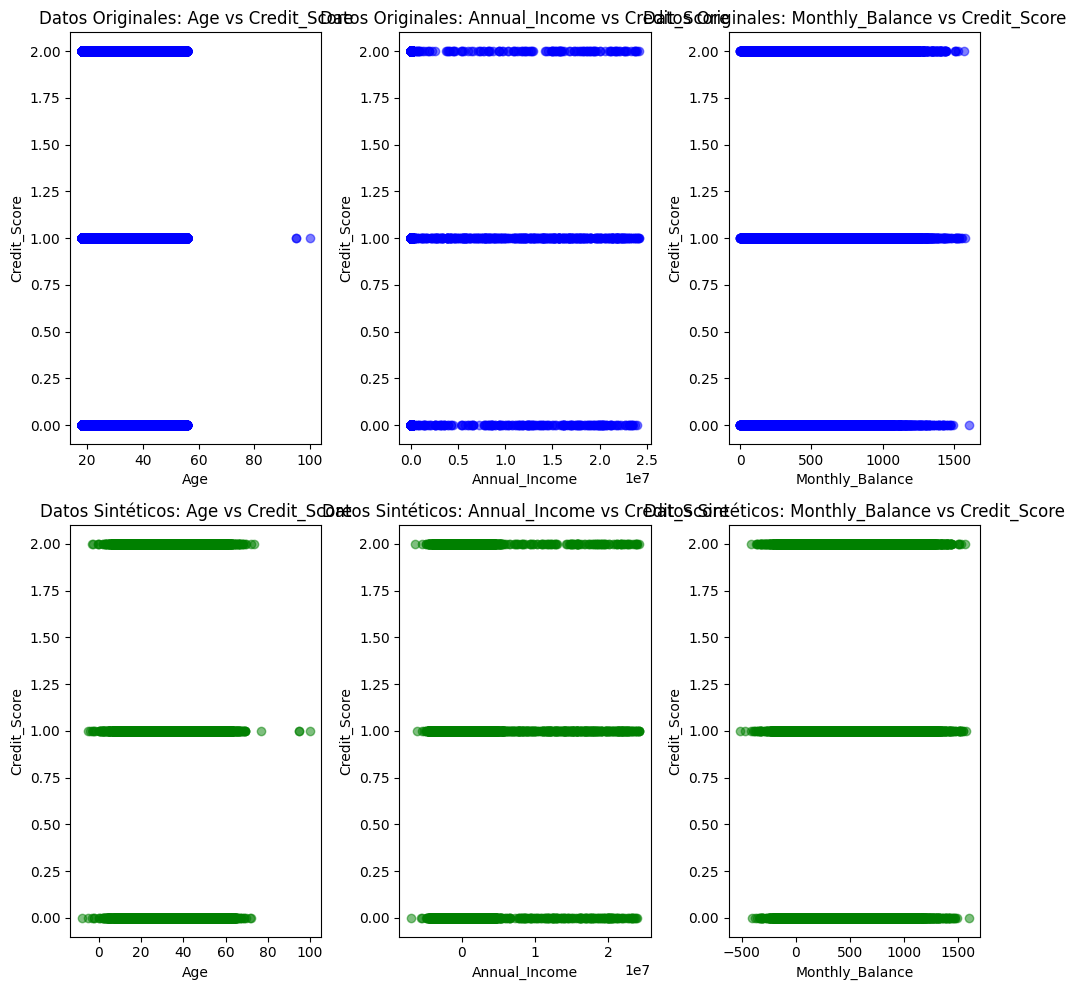

In [22]:
import matplotlib.pyplot as plt

# Selección de las columnas a graficar
x_cols = ['Age', 'Annual_Income', 'Monthly_Balance']
y_col = 'Credit_Score'

# Crear la figura y los subplots (3 pares de gráficos)
fig, axs = plt.subplots(2, 3, figsize=(10,10))

# Iteramos sobre las columnas seleccionadas para graficar
#Este bucle for itera sobre cada columna en la lista x_cols. La variable i es un índice que se utiliza para acceder a los subplots correspondientes, y x_col es el nombre de la columna actual.
for i, x_col in enumerate(x_cols):
    # Gráfica del dataset original
    axs[0, i].scatter(df[x_col], df[y_col], alpha=0.5, color='blue')
    axs[0, i].set_title(f'Datos Originales: {x_col} vs {y_col}')
    axs[0, i].set_xlabel(x_col)
    axs[0, i].set_ylabel(y_col)

    # Gráfica del dataset duplicado
    axs[1, i].scatter(df_combined[x_col], df_combined[y_col], alpha=0.5, color='green')
    axs[1, i].set_title(f'Datos Sintéticos: {x_col} vs {y_col}')
    axs[1, i].set_xlabel(x_col)
    axs[1, i].set_ylabel(y_col)

# Ajustar el espacio entre las gráficas
plt.tight_layout()
plt.show()


In [23]:
df_combined.columns # ver nombres de las columnas de nuestro df.

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Type_Code', 'Credit_Description', 'Approved_Credit',
       'Credit_Score'],
      dtype='object')

### Tambien encontramos otras inconsistencias y procedimos a manejar el dataset y volverlo consistente lo mejor posible para un mejor trabajo mas adelante. Como en este caso encontramos en la columna Month valores menores a 1 y mayores a 12, lo cual corregimos eso.

In [24]:
unique_months = df_combined['Month'].unique()
print(f"Los valores únicos en la columna 'Month' son: {unique_months}")

Los valores únicos en la columna 'Month' son: [ 2  6  0  7  5  4  1  3  8 -1 10  9 -4 -2 -3 -5 11 12 13]


In [25]:
#convertir mi columna Month a solo enteros esta bien pero positivos mayores que cero

def convert_month_to_positive_integer(month):
  """Convierte el valor de la columna 'Month' a un entero positivo mayor que cero."""
  try:
    month_int = int(month)
    if month_int <= 0:
      return 1  # O cualquier otro valor positivo que desees asignar a los valores negativos o cero
    else:
      return month_int
  except ValueError:
    return 1  # O cualquier otro valor positivo que desees asignar a los valores no numéricos

# Aplicar la función a la columna 'Month'
df_combined['Month'] = df_combined['Month'].apply(convert_month_to_positive_integer)

# Verificar los valores únicos en 'Month' después de la conversión
print(df_combined['Month'].unique())


[ 2  6  1  7  5  4  3  8 10  9 11 12 13]


### Graficamos algunas columnas de X entre si de ambos dataset para poder observar que paso, si hubo cambios o no.

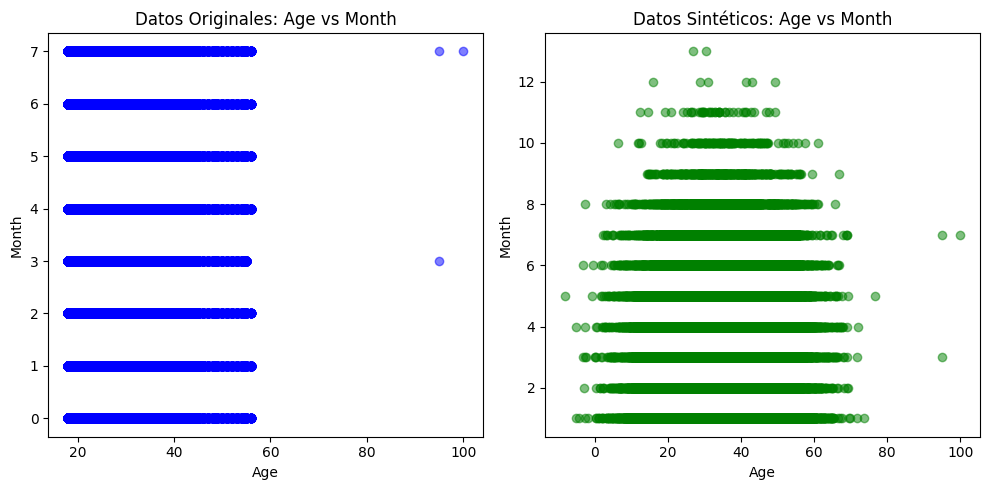

In [26]:
# Selección de las columnas a graficar (excluyendo 'Credit_Score')
x_col1 = 'Age'  # Reemplaza con el nombre de la primera columna
x_col2 = 'Month'  # Reemplaza con el nombre de la segunda columna

# Crear la figura y los subplots (2 pares de gráficos)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Gráfica del dataset original
axs[0].scatter(df[x_col1], df[x_col2], alpha=0.5, color='blue')
axs[0].set_title(f'Datos Originales: {x_col1} vs {x_col2}')
axs[0].set_xlabel(x_col1)
axs[0].set_ylabel(x_col2)

# Gráfica del dataset duplicado
axs[1].scatter(df_combined[x_col1], df_combined[x_col2], alpha=0.5, color='green')
axs[1].set_title(f'Datos Sintéticos: {x_col1} vs {x_col2}')
axs[1].set_xlabel(x_col1)
axs[1].set_ylabel(x_col2)

# Ajustar el espacio entre las gráficas
plt.tight_layout()
plt.show()


### Podemos observar que mantuvo la consistencia igualmente en estas caracteristicas.

In [27]:
# ver de todas las columnas que valores unicos tienen

for column in df_combined.columns:
  unique_values = df_combined[column].unique()
  print(f"Valores únicos en la columna '{column}': {unique_values}")


Valores únicos en la columna 'Month': [ 2  6  1  7  5  4  3  8 10  9 11 12 13]
Valores únicos en la columna 'Age': [23.         34.42981709 28.         ... 31.89521796 36.85965066
 32.77877139]
Valores únicos en la columna 'Occupation': [ 13  12  14   4   5   2   7  10   3   6   8   0  11   9  15   1  -1  17
  16  20  23  -6  -5  -3  -2  19  18  24  -4  21  22  -7  25  -8  -9 -11
  26  29 -10]
Valores únicos en la columna 'Annual_Income': [  19114.12         34847.84        143162.64       ...  181103.14049314
 -330230.25687944 1118858.79866785]
Valores únicos en la columna 'Monthly_Inhand_Salary': [4194.1708496  1824.84333333 3037.98666667 ... 2716.44705495 3549.5058834
 3439.79065337]
Valores únicos en la columna 'Num_Bank_Accounts': [ 3.          2.          1.         ...  8.44370477 10.46243441
  4.68334518]
Valores únicos en la columna 'Num_Credit_Card': [4.         5.         5.60797997 ... 1.90098249 0.54119584 1.72943285]
Valores únicos en la columna 'Interest_Rate': [ 3.     

### Para ya terminar de una vez con errores o cosas raras en los datos, lo que haremos es comparar cada columna de nuestro df_combined con nuestro df para ver si eran columnas solo positivas, enteros, mayores o no a ceros y esos detalles y asi ya tener el dataset trabajado y listo para aplicar las regresiones.

In [28]:

for column in df_combined.columns:#ecorre todas las columnas del DataFrame df_combined.
  if column in df.columns: #verifica si la columna actual (column) está presente en el DataFrame original df. Si es así, se procede a comparar las columnas.
    # Comparar la columna del df_combined con la del df original
    #Se asignan las columnas correspondientes de df y df_combined a las variables original_column y combined_column, respectivamente.
    original_column = df[column]
    combined_column = df_combined[column]

    # Verificar si la columna original tiene solo valores positivos y enteros
    if original_column.dtype == int and (original_column >= 0).all():
      # Si la columna original es de enteros positivos, asegurar que la columna combinada también lo sea
      df_combined[column] = combined_column.apply(lambda x: int(max(0, x)) if pd.notna(x) else x)
    elif original_column.dtype == float and (original_column >= 0).all():
      df_combined[column] = combined_column.apply(lambda x: float(max(0, x)) if pd.notna(x) else x)
    else:
      # Si la columna original no es de enteros positivos, no se realiza ninguna modificación
      pass

# Verificar los cambios en el dataset
for column in df_combined.columns:
    unique_values = df_combined[column].unique()
    print(f"Valores únicos en la columna '{column}': {unique_values}")

# Mostrar las primeras filas para verificar
df_combined.head()


Valores únicos en la columna 'Month': [ 2  6  1  7  5  4  3  8 10  9 11 12 13]
Valores únicos en la columna 'Age': [23.         34.42981709 28.         ... 31.89521796 36.85965066
 32.77877139]
Valores únicos en la columna 'Occupation': [13 12 14  4  5  2  7 10  3  6  8  0 11  9 15  1 17 16 20 23 19 18 24 21
 22 25 26 29]
Valores únicos en la columna 'Annual_Income': [  19114.12         34847.84        143162.64       ... 1679441.92052042
  181103.14049314 1118858.79866785]
Valores únicos en la columna 'Monthly_Inhand_Salary': [4194.1708496  1824.84333333 3037.98666667 ... 2716.44705495 3549.5058834
 3439.79065337]
Valores únicos en la columna 'Num_Bank_Accounts': [ 3.          2.          1.         ...  8.44370477 10.46243441
  4.68334518]
Valores únicos en la columna 'Num_Credit_Card': [4.         5.         5.60797997 ... 1.90098249 0.54119584 1.72943285]
Valores únicos en la columna 'Interest_Rate': [ 3.          6.          8.         ... 17.12898657  7.91733132
  7.95117547]
Val

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Type_Code,Credit_Description,Approved_Credit,Credit_Score
0,2,23.000000,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,0,1,49.574949,118.280222,3,284.629162,H,High Credit Score,True,2
1,6,34.429817,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,267,1,49.574949,81.699521,4,331.209863,H,High Credit Score,True,2
2,1,23.000000,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,268,1,49.574949,199.458074,5,223.451310,H,High Credit Score,True,2
3,7,23.000000,13,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,269,1,49.574949,41.420153,1,341.489231,H,High Credit Score,True,2
4,5,23.000000,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,270,1,49.574949,62.430172,6,340.479212,H,High Credit Score,True,2


In [29]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159610 entries, 0 to 159609
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     159610 non-null  int64  
 1   Age                       159610 non-null  float64
 2   Occupation                159610 non-null  int64  
 3   Annual_Income             159610 non-null  float64
 4   Monthly_Inhand_Salary     159610 non-null  float64
 5   Num_Bank_Accounts         159610 non-null  float64
 6   Num_Credit_Card           159610 non-null  float64
 7   Interest_Rate             159610 non-null  float64
 8   Num_of_Loan               159610 non-null  float64
 9   Type_of_Loan              159610 non-null  int64  
 10  Delay_from_due_date       159610 non-null  int64  
 11  Num_of_Delayed_Payment    159610 non-null  float64
 12  Changed_Credit_Limit      159610 non-null  int64  
 13  Num_Credit_Inquiries      159610 non-null  f

### Aqui graficamos otras columnas de X para comprobar una vez mas la consistencia de nuestro nuevo dataset respecto al original.

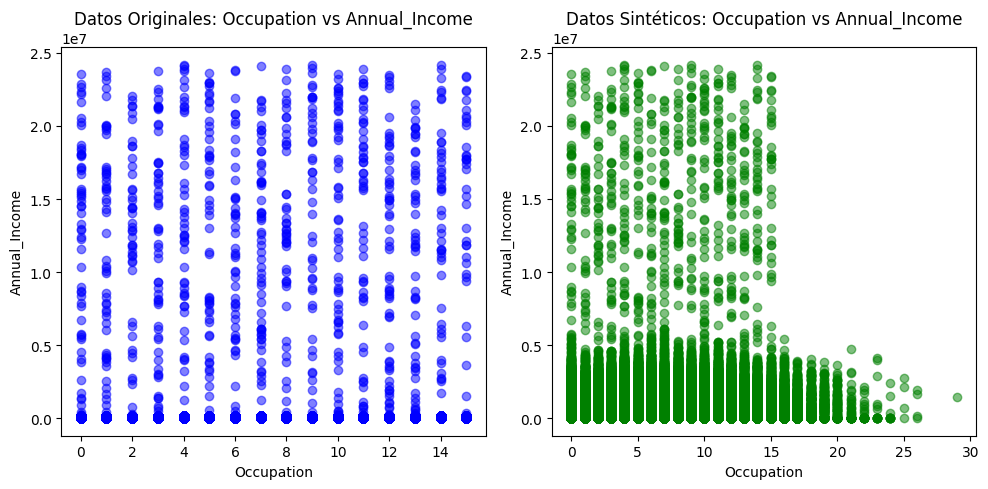

In [30]:
# Selección de las columnas a graficar (excluyendo 'Credit_Score')
x_col1 = 'Occupation'  # Reemplaza con el nombre de la primera columna
x_col2 = 'Annual_Income'  # Reemplaza con el nombre de la segunda columna

# Crear la figura y los subplots (2 pares de gráficos)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Gráfica del dataset original
axs[0].scatter(df[x_col1], df[x_col2], alpha=0.5, color='blue')
axs[0].set_title(f'Datos Originales: {x_col1} vs {x_col2}')
axs[0].set_xlabel(x_col1)
axs[0].set_ylabel(x_col2)

# Gráfica del dataset duplicado
axs[1].scatter(df_combined[x_col1], df_combined[x_col2], alpha=0.5, color='green')
axs[1].set_title(f'Datos Sintéticos: {x_col1} vs {x_col2}')
axs[1].set_xlabel(x_col1)
axs[1].set_ylabel(x_col2)

# Ajustar el espacio entre las gráficas
plt.tight_layout()
plt.show()


### Podemos observar una vez mas que no se modifico la consistencia del dataset original, tambien ahora teniendo de mejor manera los datos del dataset, procederemos a continuar con el trabajo.

In [31]:
df_combined

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Type_Code,Credit_Description,Approved_Credit,Credit_Score
0,2,23.000000,13,1.911412e+04,4194.170850,3.000000,4.000000,3.000000,4.000000,128,...,0,1,49.574949,118.280222,3,284.629162,H,High Credit Score,True,2
1,6,34.429817,13,1.911412e+04,4194.170850,3.000000,4.000000,3.000000,4.000000,128,...,267,1,49.574949,81.699521,4,331.209863,H,High Credit Score,True,2
2,1,23.000000,13,1.911412e+04,4194.170850,3.000000,4.000000,3.000000,4.000000,128,...,268,1,49.574949,199.458074,5,223.451310,H,High Credit Score,True,2
3,7,23.000000,13,1.911412e+04,1824.843333,3.000000,4.000000,3.000000,4.000000,128,...,269,1,49.574949,41.420153,1,341.489231,H,High Credit Score,True,2
4,5,23.000000,13,1.911412e+04,4194.170850,3.000000,4.000000,3.000000,4.000000,128,...,270,1,49.574949,62.430172,6,340.479212,H,High Credit Score,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159605,3,27.964761,0,0.000000e+00,2737.510118,8.986787,3.207664,19.223346,5.022133,0,...,0,1,0.000000,751.360005,4,271.919822,M,Medium Credit Score,True,1
159606,4,39.830882,8,1.679442e+06,12524.010816,2.901354,1.023146,14.010466,3.984065,7067,...,0,0,14203.974349,0.000000,3,350.372595,M,Medium Credit Score,True,1
159607,3,31.895218,13,1.811031e+05,2716.447055,8.443705,1.900982,17.128987,4.032542,1433,...,167,1,7227.930340,897.813257,2,293.848348,L,Low Credit Score,False,0
159608,1,36.859651,5,0.000000e+00,3549.505883,10.462434,0.541196,7.917331,6.977551,1596,...,208,1,0.000000,837.250142,3,476.339071,M,Medium Credit Score,True,1


### Convirtiendo las columnas de tipo caracter, texto y bool a numeros para un mejor trabajo.

In [32]:
# Convertir 'Credit_Type_Code' a números
df_combined['Credit_Type_Code_Num'] = df_combined['Credit_Type_Code'].map({'L': 0, 'M': 1, 'H': 2})

# Convertir 'Credit_Description' a números
df_combined['Credit_Description_Num'] = df_combined['Credit_Description'].map({'Low Credit Score': 0, 'Medium Credit Score': 1, 'High Credit Score': 2})

# Convertir 'Approved_Credit' (booleano) a números
df_combined['Approved_Credit_Num'] = df_combined['Approved_Credit'].astype(int)

# Eliminar las columnas originales de texto
df_combined.drop(columns=['Credit_Type_Code', 'Credit_Description','Approved_Credit'], inplace=True)

# Mostrar las primeras filas para verificar
df_combined


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Type_Code_Num,Credit_Description_Num,Approved_Credit_Num
0,2,23.000000,13,1.911412e+04,4194.170850,3.000000,4.000000,3.000000,4.000000,128,...,0,1,49.574949,118.280222,3,284.629162,2,2,2,1
1,6,34.429817,13,1.911412e+04,4194.170850,3.000000,4.000000,3.000000,4.000000,128,...,267,1,49.574949,81.699521,4,331.209863,2,2,2,1
2,1,23.000000,13,1.911412e+04,4194.170850,3.000000,4.000000,3.000000,4.000000,128,...,268,1,49.574949,199.458074,5,223.451310,2,2,2,1
3,7,23.000000,13,1.911412e+04,1824.843333,3.000000,4.000000,3.000000,4.000000,128,...,269,1,49.574949,41.420153,1,341.489231,2,2,2,1
4,5,23.000000,13,1.911412e+04,4194.170850,3.000000,4.000000,3.000000,4.000000,128,...,270,1,49.574949,62.430172,6,340.479212,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159605,3,27.964761,0,0.000000e+00,2737.510118,8.986787,3.207664,19.223346,5.022133,0,...,0,1,0.000000,751.360005,4,271.919822,1,1,1,1
159606,4,39.830882,8,1.679442e+06,12524.010816,2.901354,1.023146,14.010466,3.984065,7067,...,0,0,14203.974349,0.000000,3,350.372595,1,1,1,1
159607,3,31.895218,13,1.811031e+05,2716.447055,8.443705,1.900982,17.128987,4.032542,1433,...,167,1,7227.930340,897.813257,2,293.848348,0,0,0,0
159608,1,36.859651,5,0.000000e+00,3549.505883,10.462434,0.541196,7.917331,6.977551,1596,...,208,1,0.000000,837.250142,3,476.339071,1,1,1,1


### 4.      Dividir los datos del dataset sintético en datos de entrenamiento y prueba

In [33]:
# prompt: Dividir los datos del dataset sintético en datos de entrenamiento y prueba

from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = df_combined.drop('Credit_Score', axis=1)  # Asegúrate de que 'Credit_Score' sea tu columna objetivo
y = df_combined['Credit_Score']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir las dimensiones de los conjuntos de entrenamiento y prueba
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")


Dimensiones de X_train: (127688, 26)
Dimensiones de X_test: (31922, 26)
Dimensiones de y_train: (127688,)
Dimensiones de y_test: (31922,)


### 5.      Entrenar un modelo de regresión logística por separado, considerando el numero de clases que se vinculan al dataset elegido.

### Primero convertimos nuestras X y y en arrays de numpy.

In [34]:
# convertimos todo a array de numpy
X = np.array(X)
y = np.array(y)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X = X_train
y = y_train
# Imprimimos X y y
print(X)
print(y)
# dimensiones de X y y
print(X.shape)
print(y.shape)

[[ 2.         25.          9.         ...  0.          0.
   0.        ]
 [ 1.         54.297161    5.         ...  1.          1.
   0.        ]
 [ 4.         32.27137632  3.         ...  0.          0.
   0.        ]
 ...
 [ 2.         31.70864245 11.         ...  1.          1.
   1.        ]
 [ 4.         46.46172025  9.         ...  1.          1.
   0.        ]
 [ 4.          6.22861602  3.         ...  1.          1.
   1.        ]]
[0 1 0 ... 1 0 1]
(127688, 26)
(127688,)


### Primero haremos un modelo de regresion logistica binaria donde solo existiran dos valores 0 y 1 para cada clase que tenemos en y, es decir tendremos 3 modelos  ya que tenemos 3 valores en y(0,1,2):
1. 1 modelo donde nuestro valor 0 de y sea 1 y todos los demas 0
1. 1 modelo donde nuestro valor 1 de y sea 1 y todos los demas 0
1. 1 modelo donde nuestro valor 2 de y sea 1 y todos los demas 0
### De esta manera encontramos 3 modelos para cada caso de clases que tenemos en nuestra y, al final compararemos resultados y precisiones.

### -Primer modelo que en nuestra "y" los valores 0 son 1 y todos los demas 0.

### Convertimos nuestros valores 0 que estan en y a 1 y todos los demas(1,2) seran 0, esto para tener un enfoque positivo donde 0=1 y negativo donde 1,2=0.

In [35]:
# convertimos nuestros 0 en y a 1 y los demas valores a 0
y1 = np.where(y == 0, 1, 0)
print(y1)
print(y1.shape)
print(y)



[1 0 1 ... 0 1 0]
(127688,)
[0 1 0 ... 1 0 1]


### Aqui comprobamos que nuestra y y nuestra y modificada si cumple con lo que hicimos.

In [36]:
#ver los valores unicos que hay en y y en y_modified
print(np.unique(y))
print(np.unique(y1))
print(y1.shape)

[0 1 2]
[0 1]
(127688,)


### Una vez tenemos esto ya tendriamos listo el dataset para empezar pero antes graficamos, siempre se hace eso para tener un mejor entendimiento antes de crear cualquier modelo.

In [37]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)



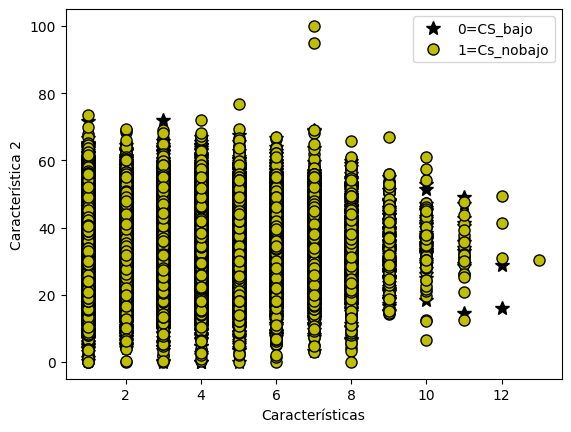

In [38]:
# usamos la funcion para graficar
plotData(X, y1)
# Asigna etiquetas más apropiadas (ajusta según los nombres reales de tus columnas)
pyplot.xlabel('Características')
pyplot.ylabel('Característica 2')
pyplot.legend(['0=CS_bajo', '1=Cs_nobajo'])
pyplot.show()

### Creamos la funcion SIGMOIDE, esta misma es la que nos ayudara a hacer las prediciones al final.

In [39]:
# funcion sigmoide
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

### Creamos la funcion para NORMALIZAR nuestra X

In [40]:
# Creamos funcion para normalizar X.
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [41]:
# Normalizamos nuestra X.
X_norm, mu, sigma = featureNormalize(X)
# Mostramos nuestra X normalizada.
print(X_norm)
print(X_norm.shape)

[[-0.69724624 -0.97001843  0.37521872 ... -1.31746149 -1.31746149
  -1.15766744]
 [-1.18674739  2.05187496 -0.51625518 ...  0.16535478  0.16535478
  -1.15766744]
 [ 0.28175604 -0.22000296 -0.96199213 ... -1.31746149 -1.31746149
  -1.15766744]
 ...
 [-0.69724624 -0.27804687  0.82095566 ...  0.16535478  0.16535478
   0.86380593]
 [ 0.28175604  1.24367833  0.37521872 ...  0.16535478  0.16535478
  -1.15766744]
 [ 0.28175604 -2.90621699 -0.96199213 ...  0.16535478  0.16535478
   0.86380593]]
(127688, 26)


### Ahora agregamos la columna de unos a nuestra X ya normalizada.

In [42]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# mostramos X
print(X)
print(X.shape)

[[ 1.         -0.69724624 -0.97001843 ... -1.31746149 -1.31746149
  -1.15766744]
 [ 1.         -1.18674739  2.05187496 ...  0.16535478  0.16535478
  -1.15766744]
 [ 1.          0.28175604 -0.22000296 ... -1.31746149 -1.31746149
  -1.15766744]
 ...
 [ 1.         -0.69724624 -0.27804687 ...  0.16535478  0.16535478
   0.86380593]
 [ 1.          0.28175604  1.24367833 ...  0.16535478  0.16535478
  -1.15766744]
 [ 1.          0.28175604 -2.90621699 ...  0.16535478  0.16535478
   0.86380593]]
(127688, 27)


### Creamos la funcion de costo que lo minimizara hasta lo mas posible (Binary Cross Entropy).

In [43]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

### Creamos la funcion del Descenso por Gradiente.

In [44]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

### Una vez ya teniendo todo esto, lo que sigue es encontrar nuestras thetas haciendo uso de las funciones que creamos.

In [45]:
X.shape

(127688, 27)

In [46]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])
theta, J_history = descensoGradiente(theta, X, y1, alpha, num_iters)

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

theta calculado por el descenso por el gradiente: [-0.91402722  0.00149344 -0.01227655  0.0064821  -0.0209513  -0.0203836
  0.01570965  0.03868873  0.06568971  0.04019248 -0.01201636  0.06016881
 -0.00158563  0.01200244 -0.01271672 -0.06808461  0.05758282  0.00201995
 -0.02609419  0.02736256 -0.01398404 -0.00986229  0.03347987 -0.00580209
 -0.65626197 -0.65626197 -1.09791263]


In [47]:
print(theta.shape)

(27,)


### Para comprobar que con estas thetas el costo converge hacia su minimo graficamos el costo.

Costo final:  0.2603841821373546


Text(0, 0.5, 'Costo J')

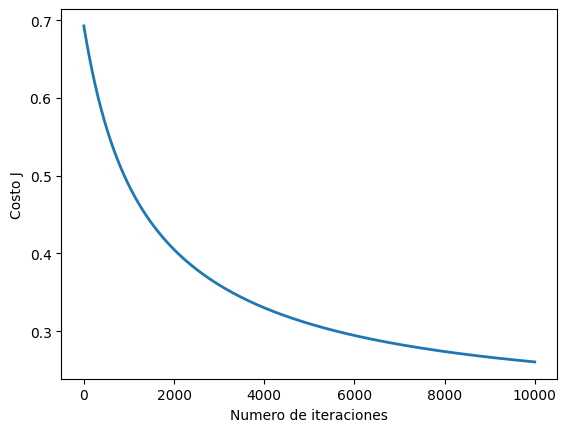

In [48]:
# Imprimir el costo final
print("Costo final: ", J_history[-1])

# grafica la convergencia del costo.
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

### Ahora procedemos a calcular la efectividad de nuestro modelo y algunos ejemplos de predicciones.

In [49]:
#Usaremos nuestra X_test para hacer las pruebas de predicciones y encontrar la precision.
X_test_norm, mu, sigma = featureNormalize(X_test) # normalizamos
m, n = X_test_norm.shape
X_test_norm = np.concatenate([np.ones((m, 1)), X_test_norm], axis=1) #agregamos 1

# encontramos las probabilidades para cada uno de los elementos de nuestra X_test
# Estos serian nuestras y_predichas.
aprueba = sigmoid(np.dot(X_test_norm, theta))
print(aprueba)

[0.52995753 0.09714261 0.46798297 ... 0.14285253 0.93204178 0.57581111]


In [50]:
# mostramos nuestra y_test
print(y_test)

[0 1 0 ... 1 0 1]


### Nuestros resultados ("aprueba") estan en terminos de probabilidad, lo que haremos sera convertirlos a 0 y 1 usando un umbral=0.5 donde sera 1 si es igual o mayor a 0.5 y de lo contrario sera 0.

In [51]:
umbral = 0.5
# Creamos un nuevo array para almacenar los valores binarios
resultados_binarios = np.where(aprueba >= umbral, 1, 0)

# Imprimimos los resultados
print(resultados_binarios)

[1 0 0 ... 0 1 1]


### Crearemos una tabla donde estara nuestra y_test1 (convertida en 0 y 1) y al lado la y predicha que son nuestras predicciones.

In [52]:
# convertimos nuestros 0 en y a 1 y los demas valores a 0
y_test1 = np.where(y_test == 0, 1, 0)
print(y_test1)
print(y_test1.shape)
print(y_test)


#ver los valores unicos que hay en y y en y_modified
print(np.unique(y_test))
print(np.unique(y_test1))

[1 0 1 ... 0 1 0]
(31922,)
[0 1 0 ... 1 0 1]
[0 1 2]
[0 1]


In [53]:
# Crear un DataFrame
df_resultados = pd.DataFrame({'y_test': y_test1, 'prediccion': resultados_binarios})

# Mostrar el DataFrame
print(df_resultados)

       y_test  prediccion
0           1           1
1           0           0
2           1           0
3           0           0
4           0           0
...       ...         ...
31917       0           0
31918       1           0
31919       0           0
31920       1           1
31921       0           1

[31922 rows x 2 columns]


In [54]:
# Calcular la precisión manualmente
def calcular_precision(y_real, y_pred):
    # Contar el número de predicciones correctas
    correctas = sum(y_real == y_pred)
    # Calcular la precisión como el porcentaje de predicciones correctas
    precision = correctas / len(y_real)
    return precision * 100

# Llamar a la función con los valores de prueba y las predicciones
precision = calcular_precision(y_test1, resultados_binarios)

# Imprimir el resultado como porcentaje
print("La precisión del modelo es: {:.2f}%".format(precision))


La precisión del modelo es: 86.82%


### Graficando la precision.

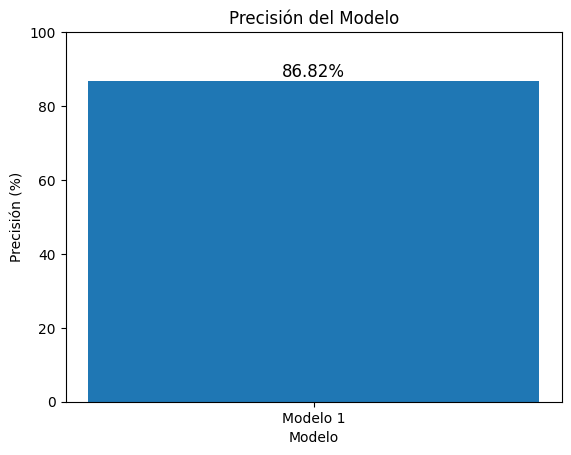

In [55]:
import matplotlib.pyplot as plt

# Datos de precisión (en este caso, solo tienes un valor de precisión)
modelos = ['Modelo 1']  # Puedes agregar más nombres de modelos si tienes varios
precisiones = [precision]  # Aquí usarías los valores de precisión calculados

# Crear la gráfica de barras
plt.bar(modelos, precisiones)

# Añadir título y etiquetas
plt.title('Precisión del Modelo')
plt.xlabel('Modelo')
plt.ylabel('Precisión (%)')

# Mostrar los valores de precisión encima de las barras
for i, v in enumerate(precisiones):
    plt.text(i, v + 1, "{:.2f}%".format(v), ha='center', fontsize=12)

# Mostrar la gráfica
plt.ylim([0, 100])  # Establecer límite del eje y para mostrar hasta 100%
plt.show()


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test1, resultados_binarios)

# Visualizar la matriz
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicciones (resultados_binarios)')
plt.ylabel('Valores Reales (y_test1)')
plt.title('Matriz de Confusión')
plt.show()

ModuleNotFoundError: No module named 'seaborn'

### -Segundo modelo que en nuestra "y" los valores 1 son 1 y todos los demas 0.

### Convertimos nuestros valores 1 que estan en ya 1 y todos los demas(0,2) serán 0, esto para tener un enfoque positivo donde 1=1 y negativo donde 0,2=0.

In [59]:
# convertimos nuestros 1 en y a 1 y los demas valores a 0
y2 = np.where(y == 1, 1, 0)
print(y2)
print(y2.shape)
print(y)

[0 1 0 ... 1 0 1]
(127688,)
[0 1 0 ... 1 0 1]


In [60]:
#ver los valores unicos que hay en y y en y_modified
print(np.unique(y))
print(np.unique(y2))
print(y2.shape)

[0 1 2]
[0 1]
(127688,)


###  graficamos, siempre se hace eso para tener un mejor entendimiento antes de crear cualquier modelo.

In [61]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)



In [62]:
X2 = X_train

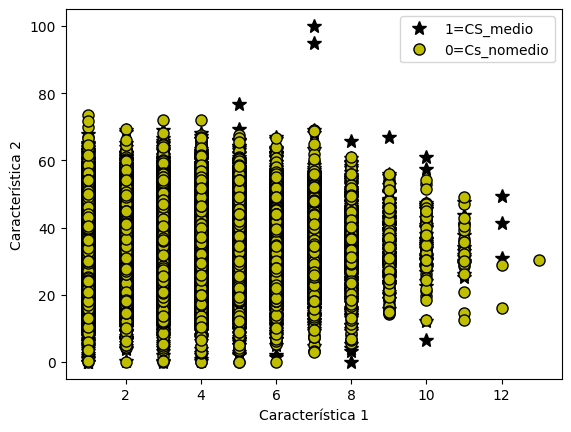

In [63]:
# usamos la funcion para graficar
plotData(X2, y2)
# Asigna etiquetas más apropiadas (ajusta según los nombres reales de tus columnas)
pyplot.xlabel('Característica 1')
pyplot.ylabel('Característica 2')
pyplot.legend(['1=CS_medio', '0=Cs_nomedio'])
pyplot.show()

### En este caso como estamos haciendo todo en el mismo cuadernillo, ya no es necesario que declare de nuevo las funciones de sigmoide, normalizacion, costo y descenso por gradiente, ya que mas arriba en el primer modelo ya lo hicimos y solo las llamaremos cuando las necesites. Tambien tomamos en cuenta que nuestra "X" ya esta normalizada y con la columna de unos agregados, asi que ese paso en este modelo lo saltamos.

### Ahora lo que hacemos es encontrar directamente nuestras thetas para este nuevo modelo.

In [64]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta2 = np.zeros(X.shape[1])
theta2, J_history = descensoGradiente(theta2, X, y2, alpha, num_iters)

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta2)))

KeyboardInterrupt: 

Costo final:  0.5267838101860844


Text(0, 0.5, 'Costo J')

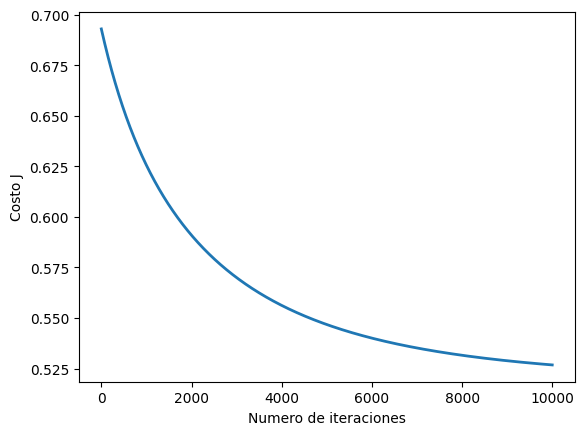

In [246]:
# Imprimir el costo final
print("Costo final: ", J_history[-1])

# grafica la convergencia del costo.
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

### Ahora procedemos a calcular la efectividad de nuestro modelo y algunos ejemplos de predicciones.

In [253]:
# encontramos las probabilidades para cada uno de los elementos de nuestra X_test
# Estos serian nuestras y_predichas.
aprueba2 = sigmoid(np.dot(X_test_norm, theta2))
print(aprueba2)

[0.71989829 0.75308864 0.17337511 ... 0.69401926 0.22236347 0.65958478]


In [248]:
# mostramos nuestra y_test
print(y_test)

[1 1 0 ... 2 0 1]


### Nuestros resultados ("aprueba") estan en terminos de probabilidad, lo que haremos sera convertirlos a 0 y 1 usando un umbral=0.5 donde sera 1 si es igual o mayor a 0.5 y de lo contrario sera 0.

In [254]:
umbral = 0.5
# Creamos un nuevo array para almacenar los valores binarios
resultados_binarios2 = np.where(aprueba2 >= umbral, 1, 0)

# Imprimimos los resultados
print(resultados_binarios2)

[1 1 0 ... 1 0 1]


### Crearemos una tabla donde estara nuestra y_test2 (convertida en 0 y 1) y al lado la y predicha que son nuestras predicciones.

In [250]:
# convertimos nuestros 1 en y a 1 y los demas valores a 0
y_test2 = np.where(y_test == 1, 1, 0)
print(y_test2)
print(y_test2.shape)
print(y_test)


#ver los valores unicos que hay en y y en y_modified
print(np.unique(y_test))
print(np.unique(y_test2))

[1 1 0 ... 0 0 1]
(31922,)
[1 1 0 ... 2 0 1]
[0 1 2]
[0 1]


In [255]:
# Crear un DataFrame
df_resultados = pd.DataFrame({'y_test': y_test2, 'prediccion': resultados_binarios2})

# Mostrar el DataFrame
print(df_resultados)

       y_test  prediccion
0           1           1
1           1           1
2           0           0
3           0           0
4           0           1
...       ...         ...
31917       1           1
31918       0           1
31919       0           1
31920       0           0
31921       1           1

[31922 rows x 2 columns]


In [256]:
# Calcular la precisión manualmente
def calcular_precision(y_real, y_pred):
    # Contar el número de predicciones correctas
    correctas = sum(y_real == y_pred)
    # Calcular la precisión como el porcentaje de predicciones correctas
    precision = correctas / len(y_real)
    return precision * 100

# Llamar a la función con los valores de prueba y las predicciones
precision = calcular_precision(y_test2, resultados_binarios2)

# Imprimir el resultado como porcentaje
print("La precisión del modelo es: {:.2f}%".format(precision))


La precisión del modelo es: 76.50%


### Graficamos la precision de 2 formas.

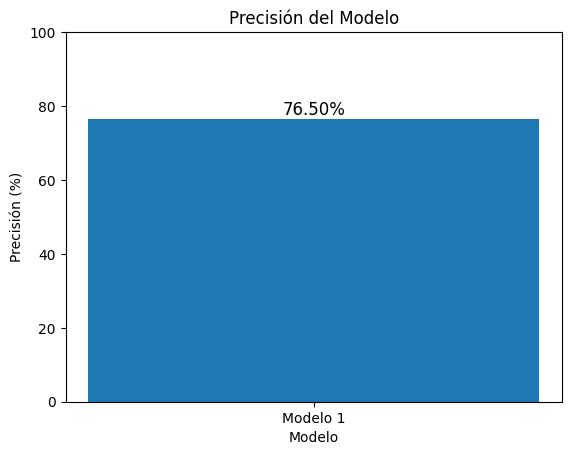

In [257]:
import matplotlib.pyplot as plt

# Datos de precisión (en este caso, solo tienes un valor de precisión)
modelos = ['Modelo 2']  # nombres del Modelo
precisiones = [precision]  # lista con los valores de precisión correspondientes al modelo

# Crear la gráfica de barras
plt.bar(modelos, precisiones)

# Añadir título y etiquetas
plt.title('Precisión del Modelo')
plt.xlabel('Modelo')
plt.ylabel('Precisión (%)')

# Mostrar los valores de precisión encima de las barras
for i, v in enumerate(precisiones):
    plt.text(i, v + 1, "{:.2f}%".format(v), ha='center', fontsize=12)
# plt.text: Agregar texto a la gráfica
    # i: Índice de la barra actual
    # v: Valor de precisión actual
    # v + 1: Posición vertical del texto (un poco por encima de la barra)
    # "{:.2f}%".format(v): Formatear el valor de precisión con 2 decimales y el símbolo %
    # ha='center': Centrar el texto horizontalmente
    # fontsize=12: Establecer el tamaño de la fuente


# Mostrar la gráfica
plt.ylim([0, 100])  # Establecer límite del eje y para mostrar hasta 100%
plt.show()


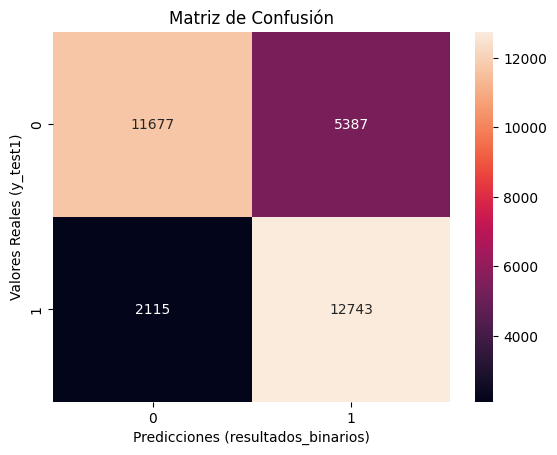

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test2, resultados_binarios2)
# Esta línea calcula la matriz de confusión. Necesita como entrada:
# - y_test2: Los valores reales (etiquetas verdaderas) de tu conjunto de prueba.
# - resultados_binarios2: Las predicciones realizadas por tu modelo.
# La matriz de confusión te indica cuántas predicciones fueron correctas (diagonal principal)
# y cuántas fueron incorrectas (fuera de la diagonal principal).


# Visualizar la matriz
sns.heatmap(cm, annot=True, fmt='d')
# Esta línea crea un mapa de calor (heatmap) utilizando Seaborn.
# - cm: La matriz de confusión calculada anteriormente.
# - annot=True: Muestra los valores numéricos dentro de cada celda de la matriz.
# - fmt='d': Formatea los valores como enteros.
plt.xlabel('Predicciones (resultados_binarios)')
plt.ylabel('Valores Reales (y_test1)')
plt.title('Matriz de Confusión')
plt.show()

### Tercer modelo donde en nuestra "y" los valores 2 seran 1 y todos los demas 0.

### Convertimos nuestros valores 2 que estan en y a 1 y todos los demas(0,1) serán 0, esto para tener un enfoque positivo donde 2=1 y negativo donde 0,1=0.

In [260]:
# convertimos nuestros 1 en y a 1 y los demas valores a 0
y3 = np.where(y == 2, 1, 0)
print(y3)
print(y3.shape)
print(y)

[0 0 0 ... 1 0 0]
(127688,)
[0 1 0 ... 2 1 1]


In [262]:
#ver los valores unicos que hay en y y en y_modified
print(np.unique(y))
print(np.unique(y3))
print(y3.shape)

[0 1 2]
[0 1]
(127688,)


### graficamos, siempre se hace eso para tener un mejor entendimiento antes de crear cualquier modelo.

In [263]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)



In [265]:
X3 = X_train

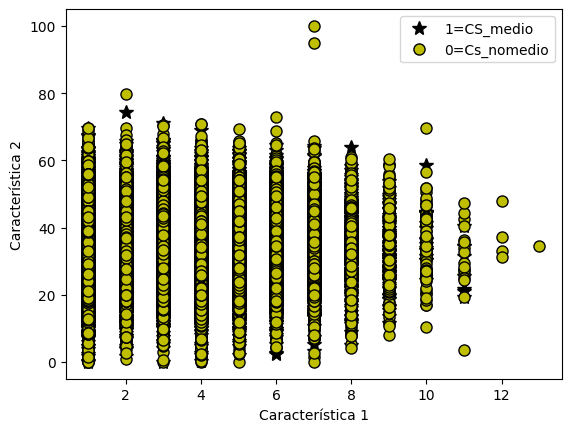

In [266]:
# usamos la funcion para graficar
plotData(X3, y3)
# Asigna etiquetas más apropiadas (ajusta según los nombres reales de tus columnas)
pyplot.xlabel('Característica 1')
pyplot.ylabel('Característica 2')
pyplot.legend(['1=CS_medio', '0=Cs_nomedio'])
pyplot.show()

### En este modelo de igual forma, solo llamamos a todas las funciones creadas arriba, Tambien tomamos en cuenta que nuestra X ya esta normalizada y con la columna de unos agregada.
#### Procedemos a encontrar nuestras thetas de este 3er modelo.

In [267]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta3 = np.zeros(X.shape[1])
theta3, J_history = descensoGradiente(theta3, X, y3, alpha, num_iters)

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta3)))

theta calculado por el descenso por el gradiente: [-1.26897130e+00 -1.44731912e-02  2.68134793e-02 -1.67081727e-02
  2.60734701e-02  3.17495041e-02 -8.51134269e-02 -5.12173616e-02
 -8.73535982e-02 -3.27199156e-02  4.75500279e-03 -7.80733411e-02
 -5.08296720e-03  2.13196253e-02  2.49161495e-02 -1.76246769e-01
 -2.96998765e-02 -9.58504911e-04  3.74642305e-02 -1.36993426e-01
  2.87023221e-02  2.87871734e-02 -3.09777423e-02  1.00387584e-02
  5.62401860e-01  5.62401860e-01 -3.16870449e-02]


Costo final:  0.3732329454739104


Text(0, 0.5, 'Costo J')

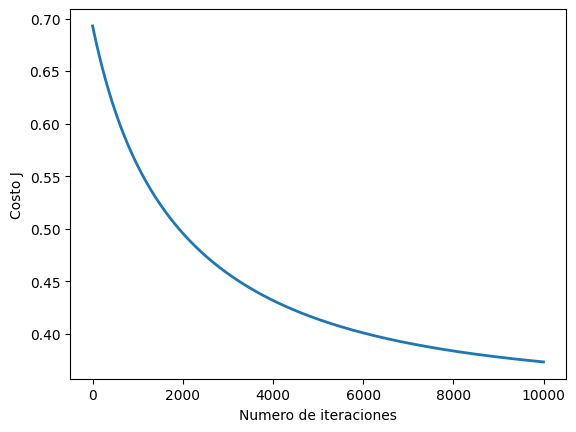

In [268]:
# Imprimir el costo final
print("Costo final: ", J_history[-1])

# grafica la convergencia del costo.
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

### Ahora procedemos a calcular la efectividad de nuestro modelo y algunos ejemplos de predicciones.

In [269]:
# encontramos las probabilidades para cada uno de los elementos de nuestra X_test
# Estos serian nuestras y_predichas.
aprueba3 = sigmoid(np.dot(X_test_norm, theta3))
print(aprueba3)

[0.1889229  0.20609848 0.27330166 ... 0.61375455 0.0411789  0.24603892]


In [270]:
# mostramos nuestra y_test
print(y_test)

[1 1 0 ... 2 0 1]


### Nuestros resultados ("aprueba3") estan en terminos de probabilidad, lo que haremos sera convertirlos a 0 y 1 usando un umbral=0.5 donde sera 1 si es igual o mayor a 0.5 y de lo contrario sera 0.

In [271]:
umbral = 0.5
# Creamos un nuevo array para almacenar los valores binarios
resultados_binarios3 = np.where(aprueba3 >= umbral, 1, 0)

# Imprimimos los resultados
print(resultados_binarios3)

[0 0 0 ... 1 0 0]


### Crearemos una tabla donde estara nuestra y_test3 (convertida en 0 y 1) y al lado la y predicha que son nuestras predicciones.

In [272]:
# convertimos nuestros 2 en y a 1 y los demas valores a 0
y_test3 = np.where(y_test == 2, 1, 0)
print(y_test3)
print(y_test3.shape)
print(y_test)


#ver los valores unicos que hay en y y en y_modified
print(np.unique(y_test))
print(np.unique(y_test3))

[0 0 0 ... 1 0 0]
(31922,)
[1 1 0 ... 2 0 1]
[0 1 2]
[0 1]


In [273]:
# Crear un DataFrame
df_resultados = pd.DataFrame({'y_test': y_test3, 'prediccion': resultados_binarios3})

# Mostrar el DataFrame
print(df_resultados)

       y_test  prediccion
0           0           0
1           0           0
2           0           0
3           1           0
4           1           1
...       ...         ...
31917       0           0
31918       1           1
31919       1           1
31920       0           0
31921       0           0

[31922 rows x 2 columns]


### Calculamos la precision con esta funcion.

In [274]:
# Calcular la precisión manualmente
def calcular_precision(y_real, y_pred):
    # Contar el número de predicciones correctas
    correctas = sum(y_real == y_pred)
    # Calcular la precisión como el porcentaje de predicciones correctas
    precision = correctas / len(y_real)
    return precision * 100

# Llamar a la función con los valores de prueba y las predicciones
precision = calcular_precision(y_test3, resultados_binarios3)

# Imprimir el resultado como porcentaje
print("La precisión del modelo es: {:.2f}%".format(precision))


La precisión del modelo es: 89.35%


### Graficamos la precision de este ultimo modelo igualmente de 3 formas.

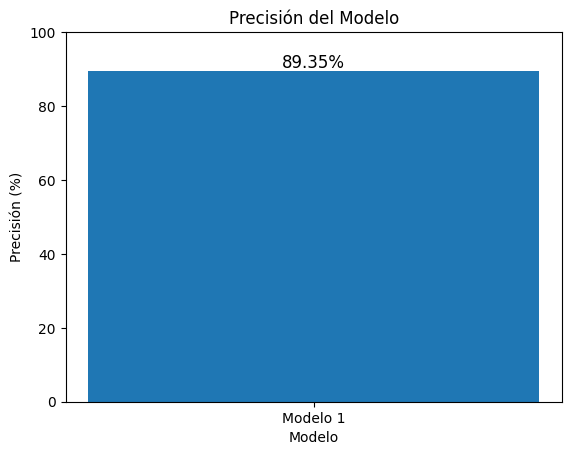

In [275]:
import matplotlib.pyplot as plt

# Datos de precisión (en este caso, solo tienes un valor de precisión)
modelos = ['Modelo 3']  # Puedes agregar más nombres de modelos si tienes varios
precisiones = [precision]  # Aquí usarías los valores de precisión calculados

# Crear la gráfica de barras
plt.bar(modelos, precisiones)

# Añadir título y etiquetas
plt.title('Precisión del Modelo')
plt.xlabel('Modelo')
plt.ylabel('Precisión (%)')

# Mostrar los valores de precisión encima de las barras
for i, v in enumerate(precisiones):
    plt.text(i, v + 1, "{:.2f}%".format(v), ha='center', fontsize=12)

# Mostrar la gráfica
plt.ylim([0, 100])  # Establecer límite del eje y para mostrar hasta 100%
plt.show()


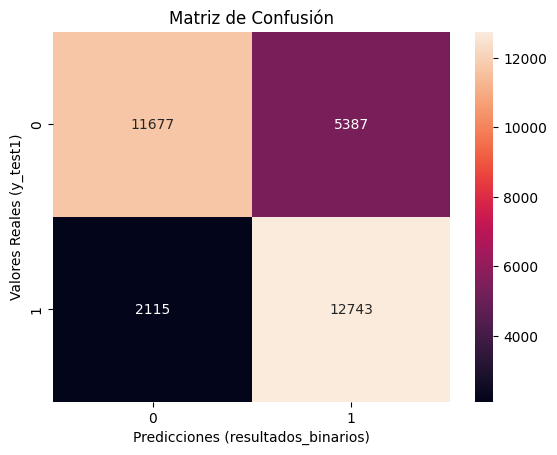

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test2, resultados_binarios2)

# Visualizar la matriz
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicciones (resultados_binarios)')
plt.ylabel('Valores Reales (y_test1)')
plt.title('Matriz de Confusión')
plt.show()

### 6.     Entrenar un modelo One-vs-All para reemplazar el modelo desarrollado en los puntos 5 y 6.



In [277]:
print(df_combined.shape)

(159610, 27)


In [278]:
#numero de clases que hay en mi y
unique_classes = np.unique(y)
num_classes = len(unique_classes)

print("Número de clases únicas en 'y':", num_classes)


Número de clases únicas en 'y': 3


In [279]:
# La entrada es de 14 elemento contando con x0
input_layer_size  = 27 # numero de columnas de nuestro dataset inicialmente.

# 3 etiquetas, de 1 a 3 (tomar en cuenta que se asigna "0" a la etiqueta 3)
num_labels = 3 # numero de clases en nuestra "y"

# Numero de ejemplos.
m = y.size

In [281]:
X_one_vs_all = X_train
print(X_one_vs_all)
print(y)

[[ 2.         25.          9.         ...  0.          0.
   0.        ]
 [ 2.         41.81891496  4.         ...  1.          1.
   1.        ]
 [ 6.         43.81321561 12.         ...  0.          0.
   1.        ]
 ...
 [ 2.         41.59066613 10.         ...  1.          1.
   0.        ]
 [ 2.         27.66007723 10.         ...  1.          1.
   1.        ]
 [ 1.         55.86983924  4.         ...  1.          1.
   1.        ]]
[0 1 0 ... 2 1 1]


### Normalizamos nuestra X_one_vs_all

In [286]:
# llamamos a la funcion para normalizar nuestra X.
X_norm_one_vs_all, mu, sigma = featureNormalize(X_one_vs_all)

X_one_vs_all = X_norm_one_vs_all.copy()
print(X_one_vs_all)

[[-0.69680378 -0.9763101   0.37776497 ... -1.31746149 -1.31746149
  -1.15542881]
 [-0.69680378  0.76546202 -0.73666918 ...  0.16535478  0.16535478
   0.86547955]
 [ 1.26230646  0.97199242  1.04642545 ... -1.31746149 -1.31746149
   0.86547955]
 ...
 [-0.69680378  0.74182449  0.60065179 ...  0.16535478  0.16535478
  -1.15542881]
 [-0.69680378 -0.70083167  0.60065179 ...  0.16535478  0.16535478
   0.86547955]
 [-1.18658134  2.22058014 -0.73666918 ...  0.16535478  0.16535478
   0.86547955]]


In [289]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X_one_vs_all.shape

print(X_one_vs_all.shape)
print(m)
print(n)

(127688, 26)
127688
26


### creamos nuestra funcion SIGMOIDE para one vs all.

In [290]:
def sigmoid_one_vs_all(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

### Ahora un concepto que tenemos que tomar en cuenta es la vectorizacion de nuestras funciones de costo y descenso por gradiente. Vectorizamos porque nos permite realizar cálculos de manera más eficiente en el aprendizaje automático. Al utilizar operaciones matriciales, podemos procesar grandes cantidades de datos de forma más rápida y con menos código. Esto es especialmente útil en la regresión logística, donde necesitamos calcular la función de costo y el gradiente para ajustar los parámetros del modelo.


### Creamos la funcion del Costo vectorizada.

In [291]:
def lrCostFunction(theta, X, y, lambda_):
    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

#     J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
#     theta = theta - (alpha / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad
#    return J, theta

### Creamos la funcion One vs All.

#### Modificamos un poco esta funcion, solo aumentando una parte para que se pueda almacenar los costos para luego poder graficarlos de acuerdo al numero de iteraciones, solo eso.

In [312]:
def oneVsAll(X, y, num_labels, lambda_, num_iters):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    cost_history = []  # Para almacenar el costo durante el entrenamiento de todas las clases

    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        cost_history_c = []  # Costo por clase

        # Función callback para registrar el costo en cada iteración
        def cost_callback(theta):
            J, _ = lrCostFunction(theta, X, (y == c).astype(int), lambda_)
            cost_history_c.append(J)

        # Optimización con devolución de llamada para registrar el costo
        options = {'maxiter': num_iters}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                args=(X, (y == c).astype(int), lambda_),
                                jac=True,
                                method='CG',
                                callback=cost_callback,
                                options=options)

        all_theta[c] = res.x
        cost_history.append(cost_history_c)

    return all_theta, cost_history

In [313]:
all_theta = np.zeros((num_labels, n + 1))
all_theta

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Procedemos a usar la funcion de one vs all con un valor de lambda de 0.1.

In [314]:
lambda_ = 0.1
num_iters = 100  # Número de iteraciones de entrenamiento
all_theta, cost_history = oneVsAll(X_one_vs_all, y, num_labels, lambda_,num_iters)
print(all_theta.shape)
#imprimimos nuestras thetas que serian 3 por nuestras 3 clases en y.
print(all_theta)

(3, 27)
[[-2.07347992e+00  1.93519332e-02 -3.04583688e-03 -5.92257676e-03
  -3.29366044e-02 -2.73014152e-02  2.50095679e-02  3.07325292e-02
   5.09301722e-02  3.37196797e-02 -2.40116833e-03  3.60726778e-02
   2.55896220e-03  2.46617255e-02 -7.42071845e-03 -4.28618489e-02
   4.93698956e-02 -1.50475889e-02 -1.50951676e-02  2.39913992e-02
  -3.21214690e-02 -1.29949151e-02  2.19894885e-02 -1.42318370e-02
  -1.05155344e+00 -1.05155344e+00 -2.07256217e+00]
 [-2.35764322e-01 -1.33980421e-02 -3.33316086e-02  1.18783413e-02
   3.67659663e-02 -2.83902408e-02  1.19103984e-01  5.67172086e-02
   7.55386785e-02  2.74621689e-02 -3.49976115e-04  6.93519509e-02
   5.08559679e-03 -4.27499091e-02  2.89650606e-02  2.78529098e-01
   7.84946871e-03  4.11065001e-03 -3.81854469e-02  7.87518799e-02
   2.64712535e-02  8.11279296e-03 -6.59389996e-03 -8.32372399e-03
  -7.35569698e-02 -7.35569698e-02  1.36591558e+00]
 [-1.99604246e+00 -2.65975988e-02  3.48990053e-02 -2.95222567e-02
   4.79121148e-02  3.85136642e-0

### Ya tenemos nuestras thetas y todo, ahora estamos listos para hacer predicciones asi como tambien ver la precision de nuestro modelo.

### Para hacer predicciones en one vs all creamos una funcion predictOneVsAll

In [315]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

### Ahora si podemos hacer predicciones, compararlas con las reales y ademas saber la precision de nuestro modelo.

In [316]:
print(X_one_vs_all.shape)
pred = predictOneVsAll(all_theta, X_one_vs_all)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))

#Crea una copia de un subconjunto de X (filas 100 a 145) para usarlo como conjunto de prueba.
XPrueba = X_one_vs_all[100:145, :].copy()
print(XPrueba.shape)

#Agrega una columna de unos al principio de XPrueba para representar el término de intersección en la regresión logística.
XPrueba = np.concatenate([np.ones((45, 1)), XPrueba], axis=1)
print(XPrueba.shape)

# Calcula las predicciones para el conjunto de prueba XPrueba de la misma manera que se hizo para el conjunto de entrenamiento.
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)

# displayData(X[1002:1003, :])
print(y[100:145])

(127688, 26)
Precision del conjuto de entrenamiento: 79.56%
(45, 26)
(45, 27)
[1 1 2 1 2 2 2 1 1 1 2 1 1 0 0 1 0 0 0 2 1 1 0 1 1 1 1 1 2 0 0 0 0 0 0 1 2
 1 1 2 2 2 0 1 0]
[1 1 2 1 2 2 2 1 1 1 2 1 1 0 0 2 0 1 0 0 1 1 2 1 2 1 1 1 2 0 0 0 0 1 0 1 0
 1 1 1 2 1 0 1 1]


### Graficamos los 3 costos por nuestras 3 clases.

### Creamos la funcion que graficara.

In [317]:
def plot_cost_history(cost_history_all_classes):
    """
    Esta función grafica la historia del costo para todas las clases durante el entrenamiento
    en un escenario de clasificación One-vs-All.

    Args:
        cost_history_all_classes (list): Una lista de listas, donde cada lista interna
                                      representa la historia del costo para una sola clase.
    """

    plt.figure(figsize=(10, 6))  # Crea una figura con un tamaño específico (ancho, alto)

    for i, cost_history in enumerate(cost_history_all_classes):
        """
        Itera sobre cada historia de costo y la grafica como una línea.
        """
        plt.plot(range(len(cost_history)), cost_history, label=f'Clase {i}')  # Grafica la historia del costo con una etiqueta

    plt.xlabel('Iteraciones')  # Etiqueta del eje x: Iteraciones
    plt.ylabel('Costo J')  # Etiqueta del eje y: Costo J
    plt.title('Evolución del costo por clase durante el entrenamiento (One-vs-All)')  # Título del gráfico
    plt.legend()  # Agrega una leyenda para identificar cada línea
    plt.grid(True)  # Agrega una cuadrícula para mejorar la legibilidad
    plt.show()  # Muestra el gráfico

### Llamamos a la funcion para ya graficar.

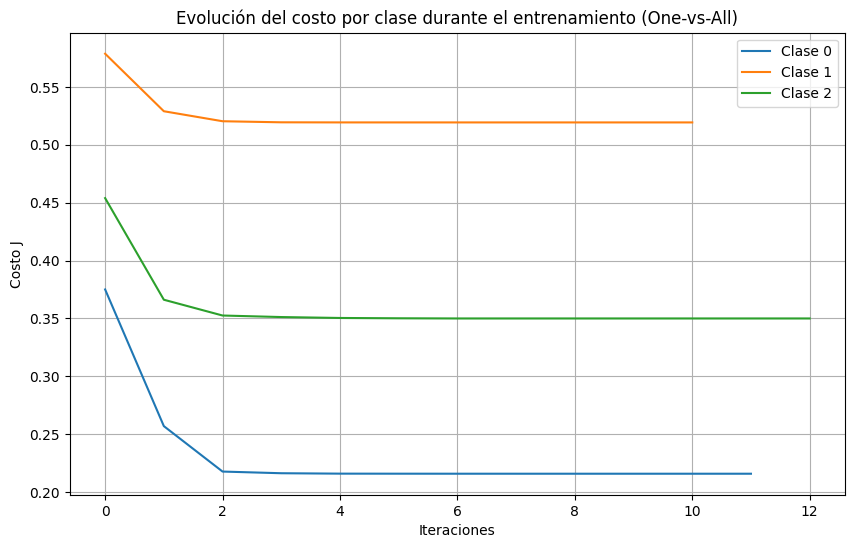

In [319]:
num_labels = 3  # Ejemplo con 3 clases
lambda_ = 0.1
num_iters = 1000  # Número de iteraciones

all_theta, cost_history_all_classes = oneVsAll(X_one_vs_all, y, num_labels, lambda_, num_iters)
plot_cost_history(cost_history_all_classes)

### Ahora graficamos la precision de 2 formas.

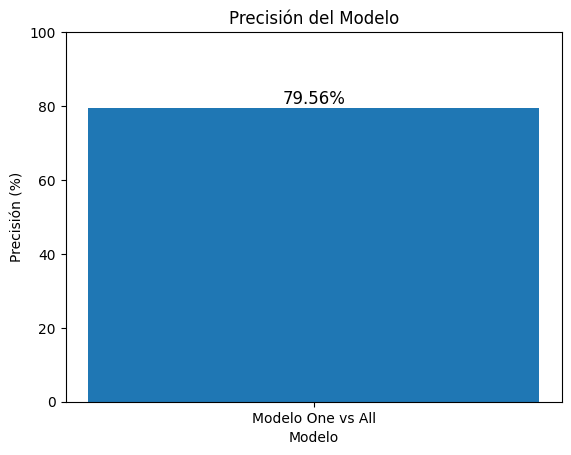

In [321]:
import matplotlib.pyplot as plt

# Calcular la precisión del modelo
pred = predictOneVsAll(all_theta, X_one_vs_all)
precision = np.mean(pred == y) * 100  # Precisión del conjunto de entrenamiento

# Datos de precisión
modelos = ['Modelo One vs All']  # Puedes agregar más nombres de modelos si tienes varios
precisiones = [precision]  # Aquí está el valor de precisión calculado

# Crear la gráfica de barras
plt.bar(modelos, precisiones)

# Añadir título y etiquetas
plt.title('Precisión del Modelo')
plt.xlabel('Modelo')
plt.ylabel('Precisión (%)')

# Mostrar los valores de precisión encima de las barras
for i, v in enumerate(precisiones):
    plt.text(i, v + 1, "{:.2f}%".format(v), ha='center', fontsize=12)

# Mostrar la gráfica
plt.ylim([0, 100])  # Establecer límite del eje y para mostrar hasta 100%
plt.show()


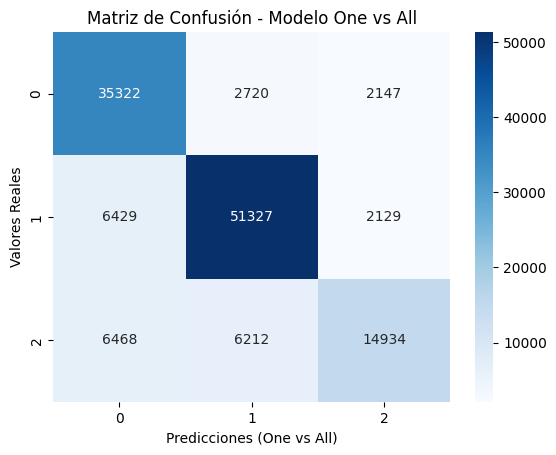

In [322]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular las predicciones del modelo One vs All
pred = predictOneVsAll(all_theta, X_one_vs_all)

# Calcular la matriz de confusión
cm = confusion_matrix(y, pred)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Añadir etiquetas a los ejes y un título
plt.xlabel('Predicciones (One vs All)')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión - Modelo One vs All')
plt.show()


### De esta manera llegamos al final de la resolucion del examen habiendo resuelto todas las indicaciones de la mejor manera posible.